In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '16cb8e70-55da-4090-81ab-3c2d3e38b43c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-12-09T07:24:31.503Z', 'error_code': 0, 'error_message': None, 'elapsed': 61, 'credit_count': 25, 'notice': None, 'total_count': 8877}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10601, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [4]:
df = data

In [5]:
# normalizes data makes it pretty in a dataframe & adds a new column timestamp
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\kakku\AppData\Local\Temp\ipykernel_12212\1495008247.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


id                           name symbol  \
0         1                        Bitcoin    BTC   
1      1027                       Ethereum    ETH   
2       825                    Tether USDt   USDT   
3        52                            XRP    XRP   
4      1839                            BNB    BNB   
...     ...                            ...    ...   
4995  15252                     OkLetsPlay   OKLP   
4996  18302                      FQSwap V2    FQS   
4997  10820                        Yieldly   YLDY   
4998  20572  Darüşşafaka Spor Kulübü Token    DSK   
4999  19714                           ℓUSD   LUSD   

                               slug  num_market_pairs  \
0                           bitcoin             10601   
1                          ethereum              7993   
2                            tether             67637   
3                               xrp              1166   
4                               bnb              1825   
...                             ...               ...   
4995                     okletsplay                 9   
4996                         fqswap                 2   
4997                        yieldly                36   
4998  darussafaka-sports-club-token                 1   
4999                 linear-finance                29   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2021-11-29T02:01:30.000Z   
4996  2022-02-23T07:50:48.000Z   
4997  2021-07-10T00:00:00.000Z   
4998  2022-06-13T08:21:39.000Z   
4999  2022-04-22T08:09:38.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
4     [marketplace, centralized-exchange, payments, ...           NaN   
...                                                 ...           ...   
4995                                                 []           NaN   
4996                                                 []  1.000000e+06   
4997  [algorand-ecosystem, trustswap-launchpad, okex...  1.000000e+10   
4998                                                 []  4.600000e+06   
4999                                                 []  5.268000e+07   

      circulating_supply        total_supply  infinite_supply  platform  \
0           1.956481e+07            19564812            False       NaN   
1           1.202179e+08    120217877.626913             True       NaN   
2           9.033564e+10  92609080553.204636             True       NaN   
3           5.395746e+10         99988170772            False       NaN   
4           1.516970e+08    151697032.124817            False       NaN   
...                  ...                 ...              ...       ...   
4995        0.000000e+00           999999999            False       NaN   
4996        0.000000e+00              372700            False       NaN   
4997        0.000000e+00         10000000000            False       NaN   
4998        0.000000e+00             4600000            False       NaN   
4999        0.000000e+00          2000000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                  

In [ ]:
#if the file is not present create a file with dataframe df
if not os.path.isfile(r"C:\Users\kakku\OneDrive\Documents\Kaksha's Data\Python API Project\API.csv"):
    df.to_csv(r"C:\Users\kakku\OneDrive\Documents\Kaksha's Data\Python API Project\API.csv",header='column_names')
else:
    #print('Error')
    df.to_csv(r"C:\Users\kakku\OneDrive\Documents\Kaksha's Data\Python API Project\API.csv",mode='a',header=False) #if the file is already present then append the data

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'5000',
        'convert':'USD'
         }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '16cb8e70-55da-4090-81ab-3c2d3e38b43c',
        }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
#         print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\kakku\OneDrive\Documents\API.csv'):
        df.to_csv(r'C:\Users\kakku\OneDrive\Documents\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\kakku\OneDrive\Documents\API.csv',mode='a',header=False)
    
   
    
#note: we get an error for data rate limit so follow the below steps
# Go to Anaconda prompt put in the error "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

In [7]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\kakku\AppData\Local\Temp\ipykernel_12212\1163533739.py:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner completed


KeyboardInterrupt: 

In [8]:
df72 = pd.read_csv(r'C:\Users\kakku\OneDrive\Documents\API.csv')

In [9]:
df72

Unnamed: 0     id                           name symbol  \
0               0      1                        Bitcoin    BTC   
1               1   1027                       Ethereum    ETH   
2               2    825                    Tether USDt   USDT   
3               3   1839                            BNB    BNB   
4               4     52                            XRP    XRP   
...           ...    ...                            ...    ...   
64995        4995  15252                     OkLetsPlay   OKLP   
64996        4996  18302                      FQSwap V2    FQS   
64997        4997  10820                        Yieldly   YLDY   
64998        4998  20572  Darüşşafaka Spor Kulübü Token    DSK   
64999        4999  19714                           ℓUSD   LUSD   

                                slug  num_market_pairs  \
0                            bitcoin             10599   
1                           ethereum              7970   
2                             tether             67425   
3                                bnb              1813   
4                                xrp              1166   
...                              ...               ...   
64995                     okletsplay                 9   
64996                         fqswap                 2   
64997                        yieldly                36   
64998  darussafaka-sports-club-token                 1   
64999                 linear-finance                29   

                     date_added  \
0      2010-07-13T00:00:00.000Z   
1      2015-08-07T00:00:00.000Z   
2      2015-02-25T00:00:00.000Z   
3      2017-07-25T00:00:00.000Z   
4      2013-08-04T00:00:00.000Z   
...                         ...   
64995  2021-11-29T02:01:30.000Z   
64996  2022-02-23T07:50:48.000Z   
64997  2021-07-10T00:00:00.000Z   
64998  2022-06-13T08:21:39.000Z   
64999  2022-04-22T08:09:38.000Z   

                                                    tags    max_supply  \
0      ['mineable', 'pow', 'sha-256', 'store-of-value...  2.100000e+07   
1      ['pos', 'smart-contracts', 'ethereum-ecosystem...           NaN   
2      ['payments', 'stablecoin', 'asset-backed-stabl...           NaN   
3      ['marketplace', 'centralized-exchange', 'payme...           NaN   
4      ['medium-of-exchange', 'enterprise-solutions',...  1.000000e+11   
...                                                  ...           ...   
64995                                                 []           NaN   
64996                                                 []  1.000000e+06   
64997  ['algorand-ecosystem', 'trustswap-launchpad', ...  1.000000e+10   
64998                                                 []  4.600000e+06   
64999                                                 []  5.268000e+07   

       circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0            1.956266e+07  1.956266e+07            False       NaN         1   
1            1.202266e+08  1.202266e+08             True       NaN         2   
2            8.993367e+10  9.260908e+10             True       NaN         3   
3            1.516978e+08  1.516978e+08            False       NaN         4   
4            5.388857e+10  9.998819e+10            False       NaN         5   
...                   ...           ...              ...       ...       ...   
64995        0.000000e+00  1.000000e+09            False       NaN      4996   
64996        0.000000e+00  3.727000e+05            False       NaN      4997   
64997        0.000000e+00  1.000000e+10            False       NaN      4998   
64998        0.000000e+00  4.600000e+06            False       NaN      4999   
64999        0.000000e+00  2.000000e+09            False       NaN      5000   

       self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                   NaN                       NaN        NaN   
1                                   NaN                       NaN        NaN   
2     

In [10]:
pd.set_option('display.float_format', lambda x : '%.5f' % x)

In [11]:
df

id                           name symbol  \
0         1                        Bitcoin    BTC   
1      1027                       Ethereum    ETH   
2       825                    Tether USDt   USDT   
3        52                            XRP    XRP   
4      1839                            BNB    BNB   
...     ...                            ...    ...   
4995  15252                     OkLetsPlay   OKLP   
4996  18302                      FQSwap V2    FQS   
4997  10820                        Yieldly   YLDY   
4998  20572  Darüşşafaka Spor Kulübü Token    DSK   
4999  19714                           ℓUSD   LUSD   

                               slug  num_market_pairs  \
0                           bitcoin             10601   
1                          ethereum              7993   
2                            tether             67637   
3                               xrp              1166   
4                               bnb              1825   
...                             ...               ...   
4995                     okletsplay                 9   
4996                         fqswap                 2   
4997                        yieldly                36   
4998  darussafaka-sports-club-token                 1   
4999                 linear-finance                29   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2013-08-04T00:00:00.000Z   
4     2017-07-25T00:00:00.000Z   
...                        ...   
4995  2021-11-29T02:01:30.000Z   
4996  2022-02-23T07:50:48.000Z   
4997  2021-07-10T00:00:00.000Z   
4998  2022-06-13T08:21:39.000Z   
4999  2022-04-22T08:09:38.000Z   

                                                   tags         max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...     21000000.00000   
1     [pos, smart-contracts, ethereum-ecosystem, coi...                NaN   
2     [payments, stablecoin, asset-backed-stablecoin...                NaN   
3     [medium-of-exchange, enterprise-solutions, arr... 100000000000.00000   
4     [marketplace, centralized-exchange, payments, ...                NaN   
...                                                 ...                ...   
4995                                                 []                NaN   
4996                                                 []      1000000.00000   
4997  [algorand-ecosystem, trustswap-launchpad, okex...  10000000000.00000   
4998                                                 []      4600000.00000   
4999                                                 []     52680000.00000   

      circulating_supply      total_supply  infinite_supply  platform  \
0         19564812.00000          19564812            False       NaN   
1        120217877.62691   120217877.62691             True       NaN   
2      90335643094.13925 92609080553.20464             True       NaN   
3      53957460767.00000       99988170772            False       NaN   
4        151697032.12482   151697032.12482            False       NaN   
...                  ...               ...              ...       ...   
4995             0.00000         999999999            False       NaN   
4996             0.00000            372700            False       NaN   
4997             0.00000       10000000000            False       NaN   
4998             0.00000           4600000            False       NaN   
4999             0.00000        2000000000            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN

In [12]:
#grouping by names to take avg of different columns

df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [13]:
df3

quote.USD.percent_change_1h  \
name                                                         
Bitcoin                                           -0.32753   
Ethereum                                           0.22301   
Tether USDt                                        0.00912   
XRP                                                0.17162   
BNB                                                0.00415   
...                                                    ...   
OkLetsPlay                                         0.28898   
FQSwap V2                                         -0.00971   
Yieldly                                            3.56857   
Darüşşafaka Spor Kulübü Token                     14.32099   
ℓUSD                                             -99.99946   

                               quote.USD.percent_change_24h  \
name                                                          
Bitcoin                                             2.00888   
Ethereum                                            0.51476   
Tether USDt                                         0.01414   
XRP                                                 7.26163   
BNB                                                 4.33634   
...                                                     ...   
OkLetsPlay                                         26.17449   
FQSwap V2                                           0.17287   
Yieldly                                            30.61717   
Darüşşafaka Spor Kulübü Token                      17.04848   
ℓUSD                                              -64.16653   

                               quote.USD.percent_change_7d  \
name                                                         
Bitcoin                                           13.87055   
Ethereum                                          13.05652   
Tether USDt                                       -0.01385   
XRP                                               11.82939   
BNB                                                6.48043   
...                                                    ...   
OkLetsPlay                                        54.77289   
FQSwap V2                                        -22.05366   
Yieldly                                           55.67650   
Darüşşafaka Spor Kulübü Token                     19.52410   
ℓUSD                                             -99.99946   

                               quote.USD.percent_change_30d  \
name                                                          
Bitcoin                                            20.12814   
Ethereum                                           23.25708   
Tether USDt                                         0.00781   
XRP                                                -1.87678   
BNB                                                -2.61258   
...                                                     ...   
OkLetsPlay                                         19.39180   
FQSwap V2                                          -7.26735   
Yieldly                                            61.60658   
Darüşşafaka Spor Kulübü Token                      -3.89137   
ℓUSD                                               96.68001   

                               quote.USD.percent_change_60d  \
name                                                          
Bitcoin                                            59.56558   
Ethereum                                           49.18204   
Tether USDt                                         0.02362   
XRP                                                37.66438   
BNB                                                17.22164   
...                                                     ...   
OkLetsPlay                                         91.66558   
FQSwap V2                                   151508535.41681   
Yieldly                                           153.54419   
Darüşşafaka Spor Kulübü Token                      18.98532   
ℓUSD                 

In [14]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.32753
         quote.USD.percent_change_24h     2.00888
         quote.USD.percent_change_7d     13.87055
         quote.USD.percent_change_30d    20.12814
         quote.USD.percent_change_60d    59.56558
                                           ...   
ℓUSD     quote.USD.percent_change_24h   -64.16653
         quote.USD.percent_change_7d    -99.99946
         quote.USD.percent_change_30d    96.68001
         quote.USD.percent_change_60d    20.31647
         quote.USD.percent_change_90d   -99.99943
Length: 29802, dtype: float64

In [15]:
df4.head(40)

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.32753
             quote.USD.percent_change_24h     2.00888
             quote.USD.percent_change_7d     13.87055
             quote.USD.percent_change_30d    20.12814
             quote.USD.percent_change_60d    59.56558
             quote.USD.percent_change_90d    70.86061
Ethereum     quote.USD.percent_change_1h      0.22301
             quote.USD.percent_change_24h     0.51476
             quote.USD.percent_change_7d     13.05652
             quote.USD.percent_change_30d    23.25708
             quote.USD.percent_change_60d    49.18204
             quote.USD.percent_change_90d    46.13718
Tether USDt  quote.USD.percent_change_1h      0.00912
             quote.USD.percent_change_24h     0.01414
             quote.USD.percent_change_7d     -0.01385
             quote.USD.percent_change_30d     0.00781
             quote.USD.percent_change_60d     0.02362
             quote.USD.percent_change_90

In [16]:
#type(df3)  #Dataframe
type(df4)  #series

pandas.core.series.Series

In [17]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.32753
        quote.USD.percent_change_24h   2.00888
        quote.USD.percent_change_7d   13.87055
        quote.USD.percent_change_30d  20.12814
        quote.USD.percent_change_60d  59.56558
...                                        ...
ℓUSD    quote.USD.percent_change_24h -64.16653
        quote.USD.percent_change_7d  -99.99946
        quote.USD.percent_change_30d  96.68001
        quote.USD.percent_change_60d  20.31647
        quote.USD.percent_change_90d -99.99943

[29802 rows x 1 columns]

In [18]:
type(df5)

pandas.core.frame.DataFrame

In [19]:
df5.count()

values    29802
dtype: int64

In [20]:
index = pd.Index(range(29808))

df6 = df5.reset_index()
df6

name                       level_1    values
0      Bitcoin   quote.USD.percent_change_1h  -0.32753
1      Bitcoin  quote.USD.percent_change_24h   2.00888
2      Bitcoin   quote.USD.percent_change_7d  13.87055
3      Bitcoin  quote.USD.percent_change_30d  20.12814
4      Bitcoin  quote.USD.percent_change_60d  59.56558
...        ...                           ...       ...
29797     ℓUSD  quote.USD.percent_change_24h -64.16653
29798     ℓUSD   quote.USD.percent_change_7d -99.99946
29799     ℓUSD  quote.USD.percent_change_30d  96.68001
29800     ℓUSD  quote.USD.percent_change_60d  20.31647
29801     ℓUSD  quote.USD.percent_change_90d -99.99943

[29802 rows x 3 columns]

In [23]:
df7 = df6.rename(columns = {'level_1':'percentage_change'})
df7

name             percentage_change    values
0      Bitcoin   quote.USD.percent_change_1h  -0.32753
1      Bitcoin  quote.USD.percent_change_24h   2.00888
2      Bitcoin   quote.USD.percent_change_7d  13.87055
3      Bitcoin  quote.USD.percent_change_30d  20.12814
4      Bitcoin  quote.USD.percent_change_60d  59.56558
...        ...                           ...       ...
29797     ℓUSD  quote.USD.percent_change_24h -64.16653
29798     ℓUSD   quote.USD.percent_change_7d -99.99946
29799     ℓUSD  quote.USD.percent_change_30d  96.68001
29800     ℓUSD  quote.USD.percent_change_60d  20.31647
29801     ℓUSD  quote.USD.percent_change_90d -99.99943

[29802 rows x 3 columns]

In [28]:
df8 = df7.head(40)
df8

name             percentage_change    values
0       Bitcoin   quote.USD.percent_change_1h  -0.32753
1       Bitcoin  quote.USD.percent_change_24h   2.00888
2       Bitcoin   quote.USD.percent_change_7d  13.87055
3       Bitcoin  quote.USD.percent_change_30d  20.12814
4       Bitcoin  quote.USD.percent_change_60d  59.56558
5       Bitcoin  quote.USD.percent_change_90d  70.86061
6      Ethereum   quote.USD.percent_change_1h   0.22301
7      Ethereum  quote.USD.percent_change_24h   0.51476
8      Ethereum   quote.USD.percent_change_7d  13.05652
9      Ethereum  quote.USD.percent_change_30d  23.25708
10     Ethereum  quote.USD.percent_change_60d  49.18204
11     Ethereum  quote.USD.percent_change_90d  46.13718
12  Tether USDt   quote.USD.percent_change_1h   0.00912
13  Tether USDt  quote.USD.percent_change_24h   0.01414
14  Tether USDt   quote.USD.percent_change_7d  -0.01385
15  Tether USDt  quote.USD.percent_change_30d   0.00781
16  Tether USDt  quote.USD.percent_change_60d   0.02362
17  Tether USDt  quote.USD.percent_change_90d   0.05568
18          XRP   quote.USD.percent_change_1h   0.17162
19          XRP  quote.USD.percent_change_24h   7.26163
20          XRP   quote.USD.percent_change_7d  11.82939
21          XRP  quote.USD.percent_change_30d  -1.87678
22          XRP  quote.USD.percent_change_60d  37.66438
23          XRP  quote.USD.percent_change_90d  37.53444
24          BNB   quote.USD.percent_change_1h   0.00415
25          BNB  quote.USD.percent_change_24h   4.33634
26          BNB   quote.USD.percent_change_7d   6.48043
27          BNB  quote.USD.percent_change_30d  -2.61258
28          BNB  quote.USD.percent_change_60d  17.22164
29          BNB  quote.USD.percent_change_90d  14.35043
30       Solana   quote.USD.percent_change_1h  -0.24074
31       Solana  quote.USD.percent_change_24h   5.76073
32       Solana   quote.USD.percent_change_7d  22.48384
33       Solana  quote.USD.percent_change_30d  71.70564
34       Solana  quote.USD.percent_change_60d 240.79046
35       Solana  quote.USD.percent_change_90d 309.51596
36         USDC   quote.USD.percent_change_1h   0.00407
37         USDC  quote.USD.percent_change_24h   0.00045
38         USDC   quote.USD.percent_change_7d   0.01888
39         USDC  quote.USD.percent_change_30d   0.00603

In [34]:
df8['percentage_change'] = df8['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

C:\Users\kakku\AppData\Local\Temp\ipykernel_12212\3541548489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['percentage_change'] = df8['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])


name percentage_change    values
0       Bitcoin                1h  -0.32753
1       Bitcoin               24h   2.00888
2       Bitcoin                7d  13.87055
3       Bitcoin               30d  20.12814
4       Bitcoin               60d  59.56558
5       Bitcoin               90d  70.86061
6      Ethereum                1h   0.22301
7      Ethereum               24h   0.51476
8      Ethereum                7d  13.05652
9      Ethereum               30d  23.25708
10     Ethereum               60d  49.18204
11     Ethereum               90d  46.13718
12  Tether USDt                1h   0.00912
13  Tether USDt               24h   0.01414
14  Tether USDt                7d  -0.01385
15  Tether USDt               30d   0.00781
16  Tether USDt               60d   0.02362
17  Tether USDt               90d   0.05568
18          XRP                1h   0.17162
19          XRP               24h   7.26163
20          XRP                7d  11.82939
21          XRP               30d  -1.87678
22          XRP               60d  37.66438
23          XRP               90d  37.53444
24          BNB                1h   0.00415
25          BNB               24h   4.33634
26          BNB                7d   6.48043
27          BNB               30d  -2.61258
28          BNB               60d  17.22164
29          BNB               90d  14.35043
30       Solana                1h  -0.24074
31       Solana               24h   5.76073
32       Solana                7d  22.48384
33       Solana               30d  71.70564
34       Solana               60d 240.79046
35       Solana               90d 309.51596
36         USDC                1h   0.00407
37         USDC               24h   0.00045
38         USDC                7d   0.01888
39         USDC               30d   0.00603

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

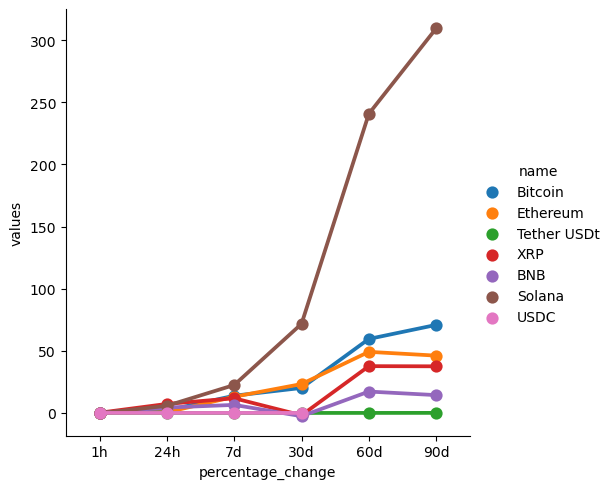

In [36]:
sns.catplot(x='percentage_change',y='values',hue='name',data=df8,kind='point')

In [50]:
df9 = df8[['name','percentage_change','values']]
df9 = df9.query("name == 'Bitcoin'")
df9

name percentage_change   values
0  Bitcoin                1h -0.32753
1  Bitcoin               24h  2.00888
2  Bitcoin                7d 13.87055
3  Bitcoin               30d 20.12814
4  Bitcoin               60d 59.56558
5  Bitcoin               90d 70.86061

<Axes: xlabel='percentage_change', ylabel='values'>

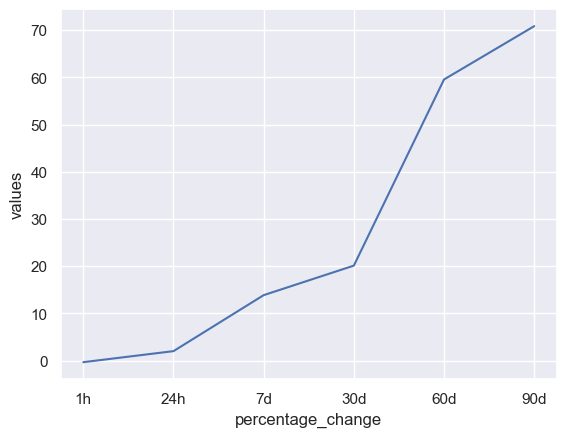

In [52]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='percentage_change',y='values',data=df9)